In [32]:
import pandas as pd
import numpy as np
from scipy.stats import *
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import os

In [33]:
df = pd.read_csv("MEGA/iris.csv")
sns.set()

In [48]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [45]:
df.duplicated().sum()

0

In [46]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [35]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [36]:
df["Species"][100]

#Species = ["Iris-Setosa", ""]



'Iris-virginica'

In [37]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [38]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [39]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


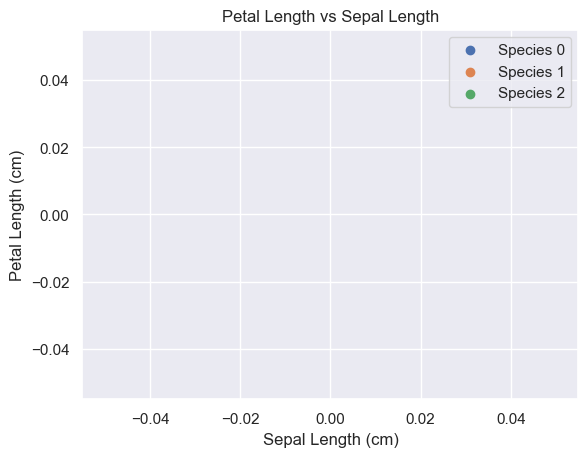

In [40]:
Species = [0, 1, 2]

for i in Species:
    x = df[df.Species == Species[i]]
    plt.scatter(x.SepalLengthCm, x.PetalLengthCm)
    #plt.scatter(x.SepalLengthCm, x.PetalLengthCm)



plt.legend(["Species 0", "Species 1", "Species 2"])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Petal Length vs Sepal Length")
plt.show()

/var/folders/4y/8v3hsc192dd3bhhzh6m1dcb40000gn/T/ipykernel_30801/2861443767.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SepalLengthCm, kde=False, fit=norm)


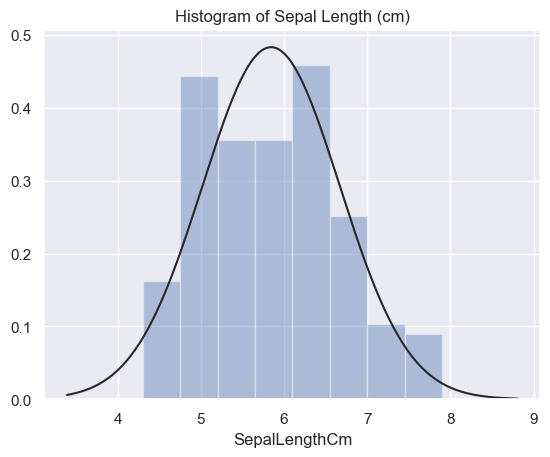

ShapiroResult(statistic=0.9760899543762207, pvalue=0.01018026564270258)

In [41]:
sns.distplot(df.SepalLengthCm, kde=False, fit=norm)
plt.title("Histogram of Sepal Length (cm)")
plt.show()
shapiro(df.SepalLengthCm)

/var/folders/4y/8v3hsc192dd3bhhzh6m1dcb40000gn/T/ipykernel_30801/953307530.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SepalWidthCm, kde=False, fit=norm)


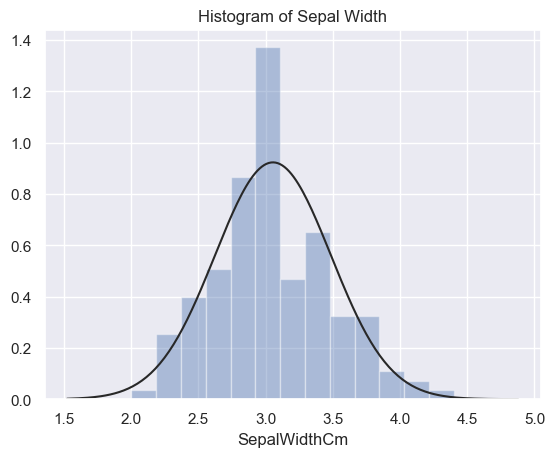

ShapiroResult(statistic=0.9837920665740967, pvalue=0.07518772780895233)

In [43]:
sns.distplot(df.SepalWidthCm, kde=False, fit=norm)
plt.title("Histogram of Sepal Width")
plt.show()
shapiro(df.SepalWidthCm)

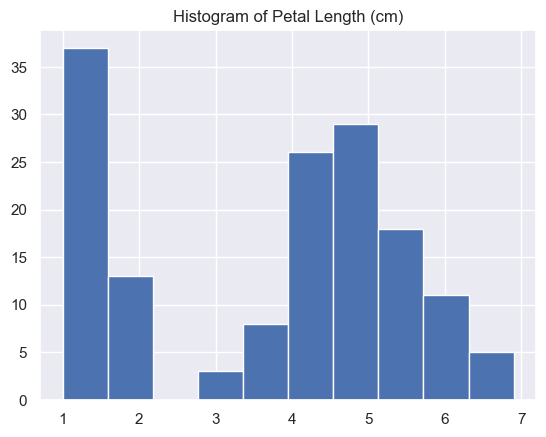

ShapiroResult(statistic=0.8764244318008423, pvalue=7.545183366985952e-10)

In [12]:
plt.hist(df.PetalLengthCm)
plt.title("Histogram of Petal Length (cm)")
plt.show()
shapiro(df.PetalLengthCm)

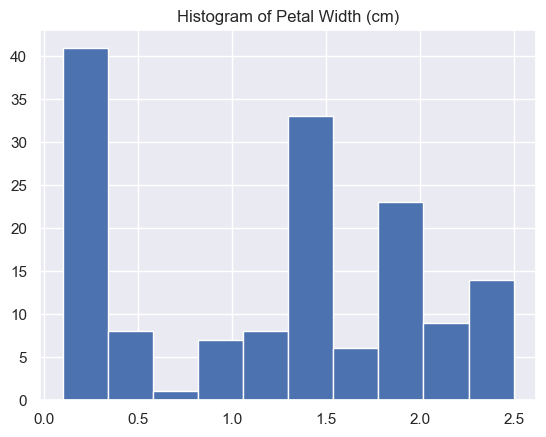

ShapiroResult(statistic=0.9026243686676025, pvalue=1.8646931110311016e-08)

In [13]:
plt.hist(df.PetalWidthCm)
plt.title("Histogram of Petal Width (cm)")

plt.show()
shapiro(df.PetalWidthCm)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [15]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=["Species"]) # This converts the "species" column to numbers and sets it to the x axis
y = df["Species"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [16]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [17]:
log.fit(x_train, y_train)

/Users/thomasnguyen/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
print ("Accuracy: " + str(log.score(x_test, y_test) * 100))


Accuracy: 100.0


In [19]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier() 
model.fit(x_train, y_train)

KNeighborsClassifier()

In [50]:
print ("A.I Accuracy: " + str(model.score(x_test, y_test) * 100), "%")

A.I Accuracy: 100.0 %


In [21]:
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

# Plotting the confusion matrix

In [22]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


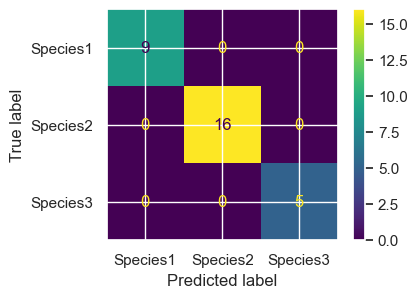

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=["Species1", "Species2", "Species3"])
fig, ax = plt.subplots(figsize=(4,3))
cmd.plot(ax=ax)
#print (classification_report(y_test, y_pred))
plt.savefig("aeuhueahg.png", dpi=300)
plt.show()

In [24]:
x_test.shape # This is 20% of the data

(30, 5)

In [25]:
x_train.shape # This is 80% of the data

(120, 5)

In [26]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


/var/folders/4y/8v3hsc192dd3bhhzh6m1dcb40000gn/T/ipykernel_30801/633275238.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SepalLengthCm, kde=False, fit=norm)


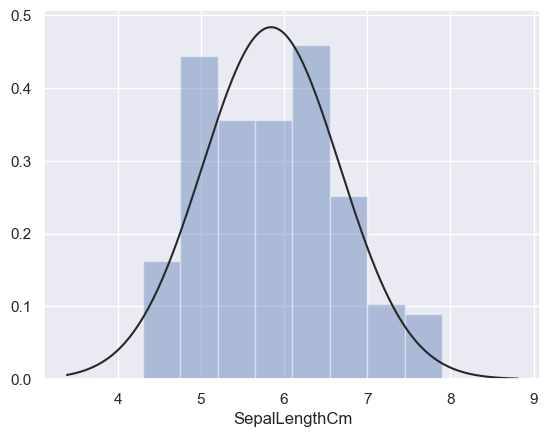

ShapiroResult(statistic=0.9760899543762207, pvalue=0.01018026564270258)

In [27]:
sns.distplot(df.SepalLengthCm, kde=False, fit=norm)
plt.show()
shapiro(df.SepalLengthCm)

In [28]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [29]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


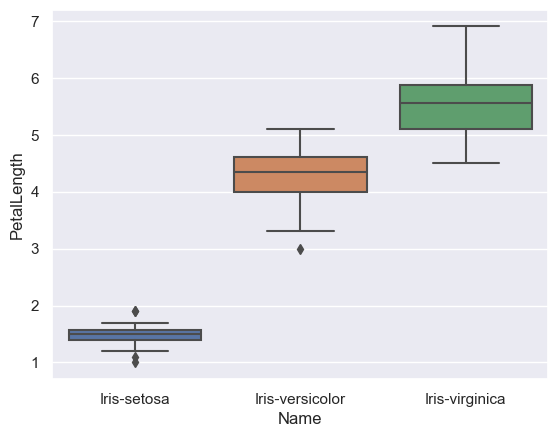

T test result: t= 12.603779441384985 p= 3.1788195478061495e-22


In [52]:
df = pd.read_csv("MEGA/datasets/iris.csv")
sns.boxplot(x="Name", y="PetalLength", data=df)
plt.show()

iris_virginica = df[df.Name == "Iris-virginica"]
iris_setosa = df[df.Name == "Iris-setosa"]
iris_versicolor = df[df.Name == "Iris-versicolor"]

t, p = ttest_ind(iris_virginica.PetalLength, iris_versicolor.PetalLength)
print ("T test result: t=", t, "p=", p)